**Lab | Customer Analysis Round 2**

For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

Dealing with the data
1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

In [2]:
import pandas as pd
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file.drop(['Unnamed: 0'], axis=1, inplace=True)
display(file.head())
display(file.shape)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 25)

In [3]:
# make headers snake case 
cols = []
for i in file.columns:
    cols.append(i.lower())
file.columns = cols
file.columns = file.columns.str.replace(" ", "_")
display(file.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# show numeric and object columns in a list
display(file._get_numeric_data().columns)
display(file.select_dtypes('object').columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [5]:
# drop duplicates
display(file.shape)
file = file.drop_duplicates()
display(file.shape)

(10910, 25)

(10873, 25)

In [6]:
# put all columns with NaN values into a list to iterate through
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name','percent_nulls']
filtered = nulls_df[nulls_df['percent_nulls'] > 0.00] 
nulls_cols = list(filtered['header_name'].values)
nulls_cols
 

['state',
 'response',
 'months_since_last_claim',
 'number_of_open_complaints',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [7]:
# replace NaN in these columns with mode
for i in nulls_cols:
    file[i] = file[i].fillna(file[i].mode()[0])
    display(file[i].value_counts(dropna=False))

California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

No     9409
Yes    1464
Name: response, dtype: int64

3.0     1049
6.0      394
1.0      386
7.0      377
4.0      372
2.0      365
5.0      354
0.0      353
10.0     345
16.0     333
11.0     331
15.0     323
13.0     320
8.0      315
12.0     306
17.0     298
14.0     297
19.0     275
9.0      275
23.0     273
25.0     269
21.0     267
18.0     257
20.0     254
22.0     245
24.0     236
29.0     233
28.0     225
31.0     219
26.0     211
27.0     207
30.0     201
34.0     199
33.0     198
35.0     156
32.0     155
Name: months_since_last_claim, dtype: int64

0.0    8764
1.0    1141
2.0     414
3.0     321
4.0     166
5.0      67
Name: number_of_open_complaints, dtype: int64

Four-Door Car    5808
Two-Door Car     2112
SUV              2009
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

Medsize    7841
Small      1962
Large      1070
Name: vehicle_size, dtype: int64

A    10873
Name: vehicle_type, dtype: int64

In [8]:
# only show data from Q1
file['effective_to_date'].dtype
file['month'] = pd.to_datetime(file['effective_to_date'])
file['month'] = file['month'].dt.month
first_quarter = file[file['month'] <= 3]
display(file['month'].unique())
first_quarter

array([2, 1])

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [22]:
def cleanup():
    import pandas as pd
    file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

    # drop the useless column
    file.drop(['Unnamed: 0'], axis=1, inplace=True)
    return file
    
    # make headers snake case 
    cols = []
    for i in file.columns:
        cols.append(i.lower())
    file.columns = cols
    file.columns = file.columns.str.replace(" ", "_")
    
    # drop duplicates
    display(file.shape)
    file = file.drop_duplicates()
    
    # put all columns with NaN values into a list to iterate through
    nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),4)*100)
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name','percent_nulls']
    filtered = nulls_df[nulls_df['percent_nulls'] > 0.00] 
    nulls_cols = list(filtered['header_name'].values)
    
    # replace NaN in these columns with mode
    for i in nulls_cols:
        file[i] = file[i].fillna(file[i].mode()[0])
        file[i] = file[i].value_counts(dropna=False)

cleanup()
display(file.head())

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


**Lab | Customer Analysis Round 3**

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

Get the data
Use the same jupyter file from the last lab, Customer Analysis Round 3
EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [2]:
import pandas as pd
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [28]:
file.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


No     8813
Yes    1466
Name: Response, dtype: int64

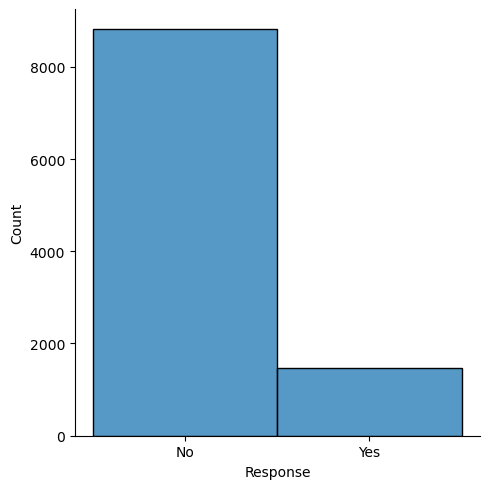

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
display(file['Response'].value_counts())
#sns.countplot(x='Response', data=file)
plt.show(sns.displot(file['Response']))

In [4]:
# replace 'Yes' with 1 and 'No' with 0
def quantify(x):
    if x == 'Yes':
        return 1
    else:
        return 0
file['Response'] = list(map(quantify, file['Response']))
display(file['Response'].unique())

array([0, 1])

<Axes: xlabel='Sales Channel', ylabel='Percent'>

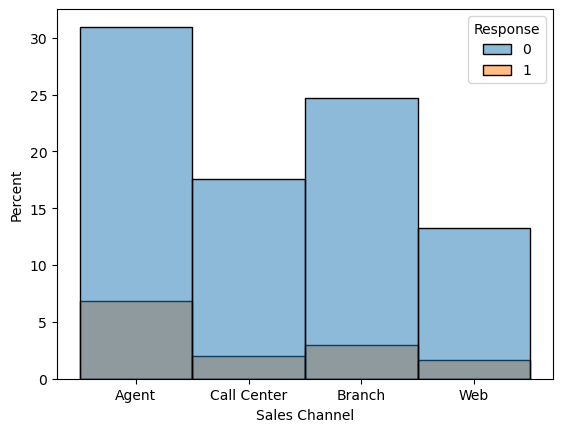

In [5]:
sns.histplot(binwidth=0.5, x='Sales Channel', hue='Response', data=file, stat='percent')

<Axes: xlabel='Total Claim Amount', ylabel='Percent'>

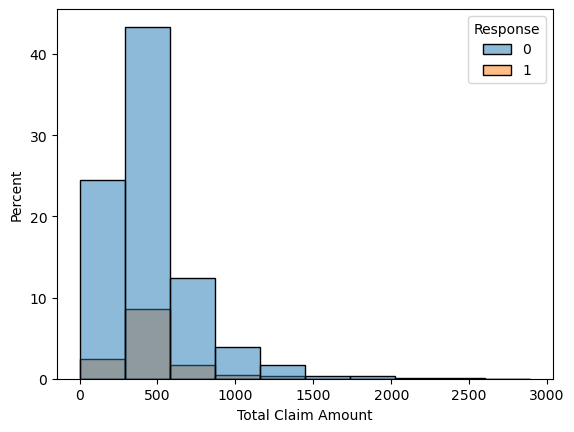

In [16]:
sns.histplot(bins=10, x='Total Claim Amount', hue='Response', data=file, stat='percent')

<Axes: xlabel='Income', ylabel='Percent'>

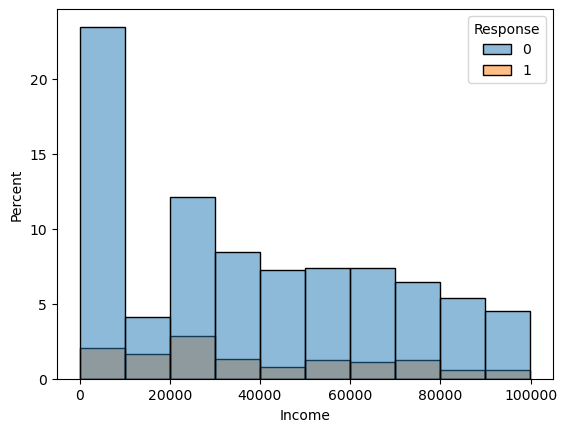

In [17]:
sns.histplot(bins=10, x='Income', hue='Response', data=file, stat='percent')